In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

In [2]:
df=pd.read_csv('COVID-19.csv')

In [3]:
df.shape

(621000, 13)

In [4]:
df.head()

,Start Date,End Date,Group,Year,Month,State,Condition Group,Condition,ICD10_codes,Age Group,COVID-19 Deaths,Number of Mentions,Flag
0,1/1/2020,9/23/2023,By Total,NaN,NaN,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,0-24,1569.0,1647.0,NaN
1,1/1/2020,9/23/2023,By Total,NaN,NaN,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,25-34,5804.0,6029.0,NaN
2,1/1/2020,9/23/2023,By Total,NaN,NaN,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,35-44,15080.0,15699.0,NaN
3,1/1/2020,9/23/2023,By Total,NaN,NaN,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,45-54,37414.0,38878.0,NaN
4,1/1/2020,9/23/2023,By Total,NaN,NaN,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,55-64,82668.0,85708.0,NaN


In [6]:
df.isna().sum()

Start Date                 0
End Date                   0
Group                      0
Year                   12420
Month                  62100
State                      0
Condition Group            0
Condition                  0
ICD10_codes                0
Age Group                  0
COVID-19 Deaths       183449
Number of Mentions    177577
Flag                  437551
dtype: int64

In [8]:
df.drop(columns='Flag',inplace=True,axis=1)

In [9]:
df['Group'].unique()

array(['By Total', 'By Year', 'By Month'], dtype=object)

In [12]:
df_cleaned = df.dropna(subset=['COVID-19 Deaths'])


In [17]:
df_cleaned.shape

(388500, 12)

In [14]:
df_cleaned.isna().sum()

Start Date                0
End Date                  0
Group                     0
Year                  10712
Month                 49051
State                     0
Condition Group           0
Condition                 0
ICD10_codes               0
Age Group                 0
COVID-19 Deaths           0
Number of Mentions        0
dtype: int64

In [15]:
df_cleaned = df_cleaned.dropna(subset=['Month'])

In [16]:
df_cleaned.isna().sum()

Start Date            0
End Date              0
Group                 0
Year                  0
Month                 0
State                 0
Condition Group       0
Condition             0
ICD10_codes           0
Age Group             0
COVID-19 Deaths       0
Number of Mentions    0
dtype: int64

Grouping and Aggregation by Year and Month:

Calculate the total number of COVID-19 deaths for each month and year. Plot the monthly trends of COVID-19 deaths over time.

    Age Group Analysis:

Find the top 3 age groups with the highest total number of mentions. Create a bar plot showing the number of mentions for each age group.

                                                                                                            State-wise COVID-19 Deaths:

Identify the top 5 states with the highest number of COVID-19 deaths. Plot these states along with their respective COVID-19 death counts.

                                                                                                            Condition Frequency Analysis:

Determine the frequency of each condition (in the 'Condition' column) and plot the top 10 most frequent conditions.

                                                                                                            Yearly Deaths Comparison:

Compare the total number of COVID-19 deaths between two specific years (e.g., 2020 and 2021). Plot a side-by-side bar plot to visualize the comparison.

                                                                                                            Trend Analysis by Condition Group:

Analyze the trend of COVID-19 deaths for a specific condition group (e.g., 'Respiratory conditions') over the months. Create a line plot showing this trend.

                                    ICD10 Codes Distribution:

Analyze the distribution of ICD10 codes and plot the top 15 most common ICD10 codes.

                                    Heatmap of Deaths by State and Month:

Create a pivot table to show the number of COVID-19 deaths by state and month. Then, create a heatmap from this pivot table.

                                    Multiple Condition Analysis:

Identify the conditions that frequently occur together with 'COVID-19'. Plot a heatmap of the top condition pairs.

                                    Deaths Proportion by Age Group and State:

Calculate the proportion of COVID-19 deaths for each age group within each state. Create a stacked bar plot to visualize this proportion.

1.question

In [19]:
deaths_by_months=df.groupby(['Year','Month'])['COVID-19 Deaths'].sum().reset_index()

In [33]:
deaths_by_months['Year']=deaths_by_months['Year'].astype(str)

In [34]:
deaths_by_months

,Year,Month,COVID-19 Deaths
0,2020,1,50
1,2020,2,140
2,2020,3,91508
3,2020,4,894126
4,2020,5,540929
5,2020,6,257469
6,2020,7,463916
7,2020,8,450845
8,2020,9,281488
9,2020,10,368204


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, '1'),
  Text(1, 0, '2'),
  Text(2, 0, '3'),
  Text(3, 0, '4'),
  Text(4, 0, '5'),
  Text(5, 0, '6'),
  Text(6, 0, '7'),
  Text(7, 0, '8'),
  Text(8, 0, '9'),
  Text(9, 0, '10'),
  Text(10, 0, '11'),
  Text(11, 0, '12')])

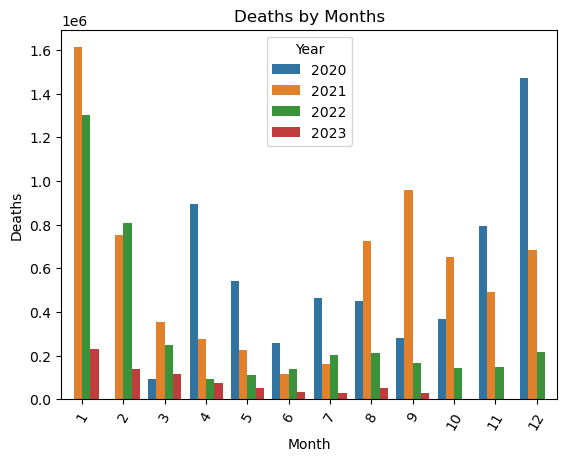

In [35]:
# Assuming deaths_by_months is your DataFrame containing the necessary data
sb.barplot(x='Month', y='COVID-19 Deaths', hue='Year', data=deaths_by_months)

plt.xlabel('Month')
plt.ylabel('Deaths')
plt.title('Deaths by Months')

plt.legend(title='Year')

plt.xticks(rotation=60)

In [36]:
df_cleaned['Age Group'].unique()

array(['0-24', '25-34', '35-44', '45-54', '55-64', '65-74', '75-84',
       '85+', 'Not stated', 'All Ages'], dtype=object)

In [38]:
mentions_by_ages=df_cleaned.groupby(['Age Group'])['Number of Mentions'].sum().reset_index()

In [39]:
mentions_by_ages

,Age Group,Number of Mentions
0,0-24,20392.0
1,25-34,71348.0
2,35-44,199974.0
3,45-54,528787.0
4,55-64,1281769.0
5,65-74,2133124.0
6,75-84,2468954.0
7,85+,2414417.0
8,All Ages,9581314.0
9,Not stated,109.0


In [40]:
mentions_by_ages.drop(index=[8,9],inplace=True,axis=0)

In [41]:
mentions_by_ages

,Age Group,Number of Mentions
0,0-24,20392.0
1,25-34,71348.0
2,35-44,199974.0
3,45-54,528787.0
4,55-64,1281769.0
5,65-74,2133124.0
6,75-84,2468954.0
7,85+,2414417.0


(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, '0-24'),
  Text(1, 0, '25-34'),
  Text(2, 0, '35-44'),
  Text(3, 0, '45-54'),
  Text(4, 0, '55-64'),
  Text(5, 0, '65-74'),
  Text(6, 0, '75-84'),
  Text(7, 0, '85+')])

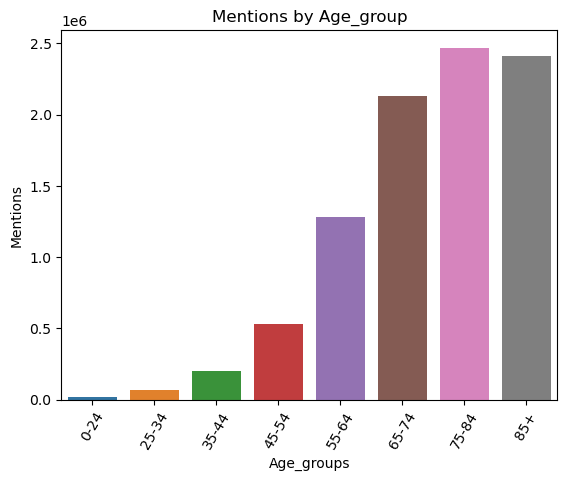

In [42]:
# Assuming deaths_by_months is your DataFrame containing the necessary data
sb.barplot(x='Age Group', y='Number of Mentions', data=mentions_by_ages)

plt.xlabel('Age_groups')
plt.ylabel('Mentions')
plt.title('Mentions by Age_group')


plt.xticks(rotation=60)

In [43]:
Deaths_by_states=df_cleaned.groupby(['State'])['COVID-19 Deaths'].sum().reset_index()

In [44]:
Deaths_by_states

,State,COVID-19 Deaths
0,Alabama,135939.0
1,Alaska,5389.0
2,Arizona,217152.0
3,Arkansas,85141.0
4,California,915615.0
5,Colorado,121711.0
6,Connecticut,76209.0
7,Delaware,17465.0
8,District of Columbia,13592.0
9,Florida,632475.0


In [48]:
Deaths_by_states=Deaths_by_states.sort_values(by='COVID-19 Deaths',ascending=False)

In [51]:
top_20=Deaths_by_states[:20]

In [52]:
top_20

,State,COVID-19 Deaths
46,United States,8833872.0
4,California,915615.0
45,Texas,811571.0
9,Florida,632475.0
39,Pennsylvania,390052.0
36,Ohio,356699.0
32,New York,297101.0
13,Illinois,278293.0
30,New Jersey,265527.0
10,Georgia,257802.0


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, 'United States'),
  Text(1, 0, 'California'),
  Text(2, 0, 'Texas'),
  Text(3, 0, 'Florida'),
  Text(4, 0, 'Pennsylvania'),
  Text(5, 0, 'Ohio'),
  Text(6, 0, 'New York'),
  Text(7, 0, 'Illinois'),
  Text(8, 0, 'New Jersey'),
  Text(9, 0, 'Georgia'),
  Text(10, 0, 'Michigan'),
  Text(11, 0, 'North Carolina'),
  Text(12, 0, 'New York City'),
  Text(13, 0, 'Arizona'),
  Text(14, 0, 'Tennessee'),
  Text(15, 0, 'Indiana'),
  Text(16, 0, 'Kentucky'),
  Text(17, 0, 'South Carolina'),
  Text(18, 0, 'Missouri'),
  Text(19, 0, 'Virginia')])

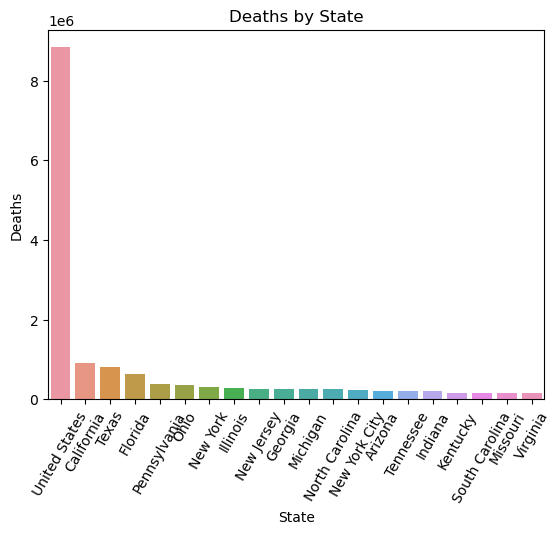

In [53]:
# Assuming deaths_by_months is your DataFrame containing the necessary data
sb.barplot(x='State', y='COVID-19 Deaths', data=top_20)

plt.xlabel('State')
plt.ylabel('Deaths')
plt.title('Deaths by State')


plt.xticks(rotation=60)

In [54]:
condition=df_cleaned['Condition Group'].value_counts()

In [56]:
condition[:10]

Circulatory diseases                          116888
Respiratory diseases                          101344
Vascular and unspecified dementia              19341
Alzheimer disease                              19308
COVID-19                                       17914
All other conditions and causes (residual)     16750
Diabetes                                       16347
Renal failure                                  16306
Malignant neoplasms                            16246
Sepsis                                         16159
Name: Condition Group, dtype: int64

<Axes: >

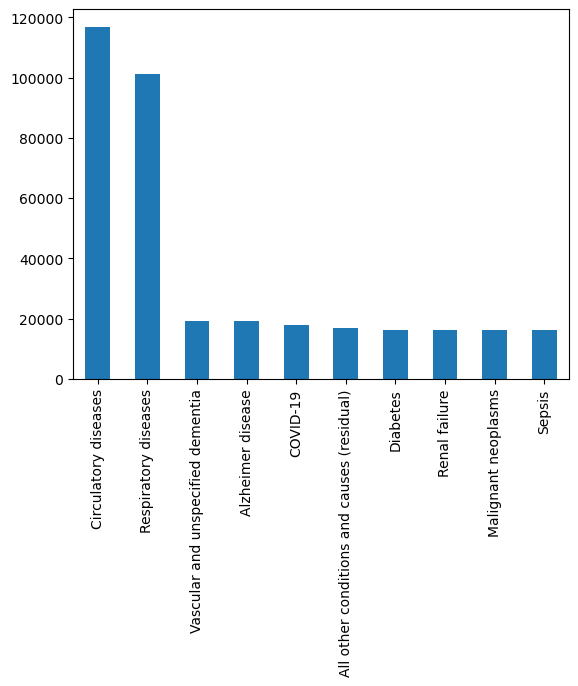

In [60]:
condition[:10].plot(kind='bar')

In [61]:
deaths_by_year=df.groupby(['Year'])['COVID-19 Deaths'].sum().reset_index()

In [66]:
deaths=deaths_by_year[:2]

In [67]:
deaths

,Year,COVID-19 Deaths
0,2020.0,11343295.0
1,2021.0,14167684.0


(array([0, 1]), [Text(0, 0, '2020.0'), Text(1, 0, '2021.0')])

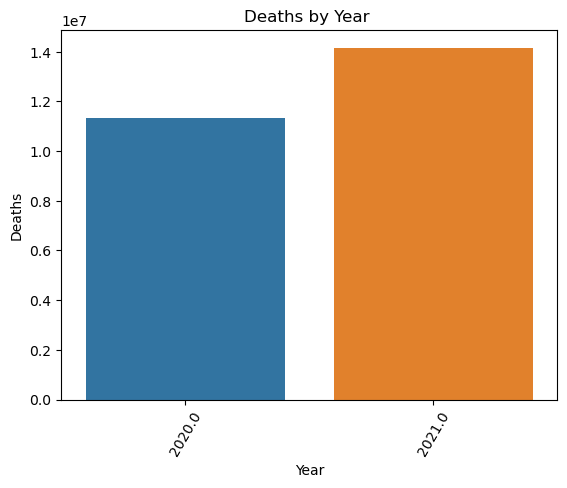

In [68]:
# Assuming deaths_by_months is your DataFrame containing the necessary data
sb.barplot(x='Year', y='COVID-19 Deaths', data=deaths)

plt.xlabel('Year')
plt.ylabel('Deaths')
plt.title('Deaths by Year ')


plt.xticks(rotation=60)

 Analyze the trend of COVID-19 deaths for a specific condition group (e.g., 'Respiratory conditions') over the months. Create a line plot showing this trend.

In [69]:
df_cleaned.head()

,Start Date,End Date,Group,Year,Month,State,Condition Group,Condition,ICD10_codes,Age Group,COVID-19 Deaths,Number of Mentions
62100,1/1/2020,1/31/2020,By Month,2020.0,1.0,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,0-24,0.0,0.0
62101,2/1/2020,2/29/2020,By Month,2020.0,2.0,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,0-24,0.0,0.0
62102,3/1/2020,3/31/2020,By Month,2020.0,3.0,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,0-24,9.0,9.0
62103,4/1/2020,4/30/2020,By Month,2020.0,4.0,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,0-24,27.0,30.0
62104,5/1/2020,5/31/2020,By Month,2020.0,5.0,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,0-24,19.0,19.0


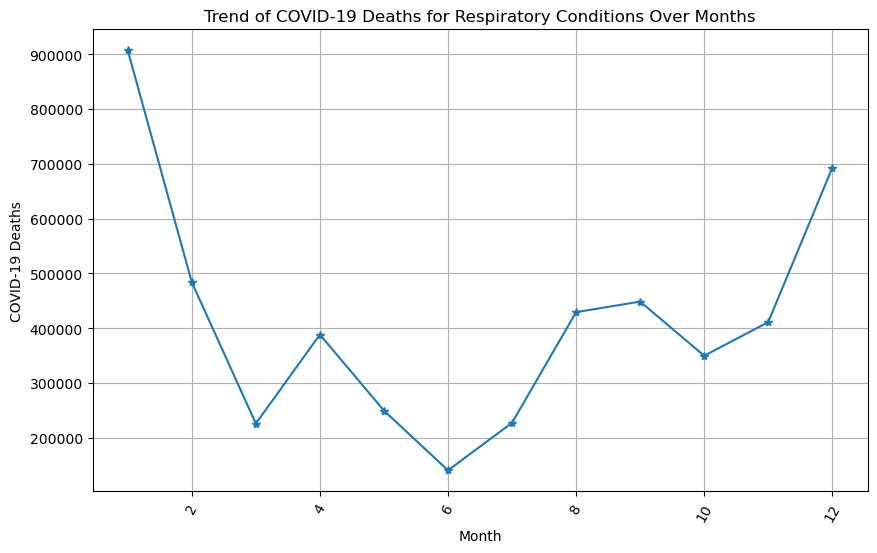

In [90]:
respiratory_conditions = df_cleaned[df_cleaned['Condition Group'] == 'Respiratory diseases']
monthly_deaths = respiratory_conditions.groupby('Month')['COVID-19 Deaths'].sum().reset_index()



# Plot the trend
plt.figure(figsize=(10, 6))
plt.plot(monthly_deaths['Month'], monthly_deaths['COVID-19 Deaths'], marker='*')
plt.xlabel('Month')
plt.ylabel('COVID-19 Deaths')
plt.title('Trend of COVID-19 Deaths for Respiratory Conditions Over Months')
plt.xticks(rotation=60)
plt.grid(True)
plt.show()

In [89]:
monthly_deaths

,Month,COVID-19 Deaths
0,1.0,907088.0
1,2.0,483792.0
2,3.0,225869.0
3,4.0,388262.0
4,5.0,249514.0
5,6.0,140434.0
6,7.0,227178.0
7,8.0,429197.0
8,9.0,448472.0
9,10.0,349610.0


In [101]:
conditions_dist=df_cleaned['ICD10_codes'].value_counts()

In [102]:
top15=conditions_dist[:15]

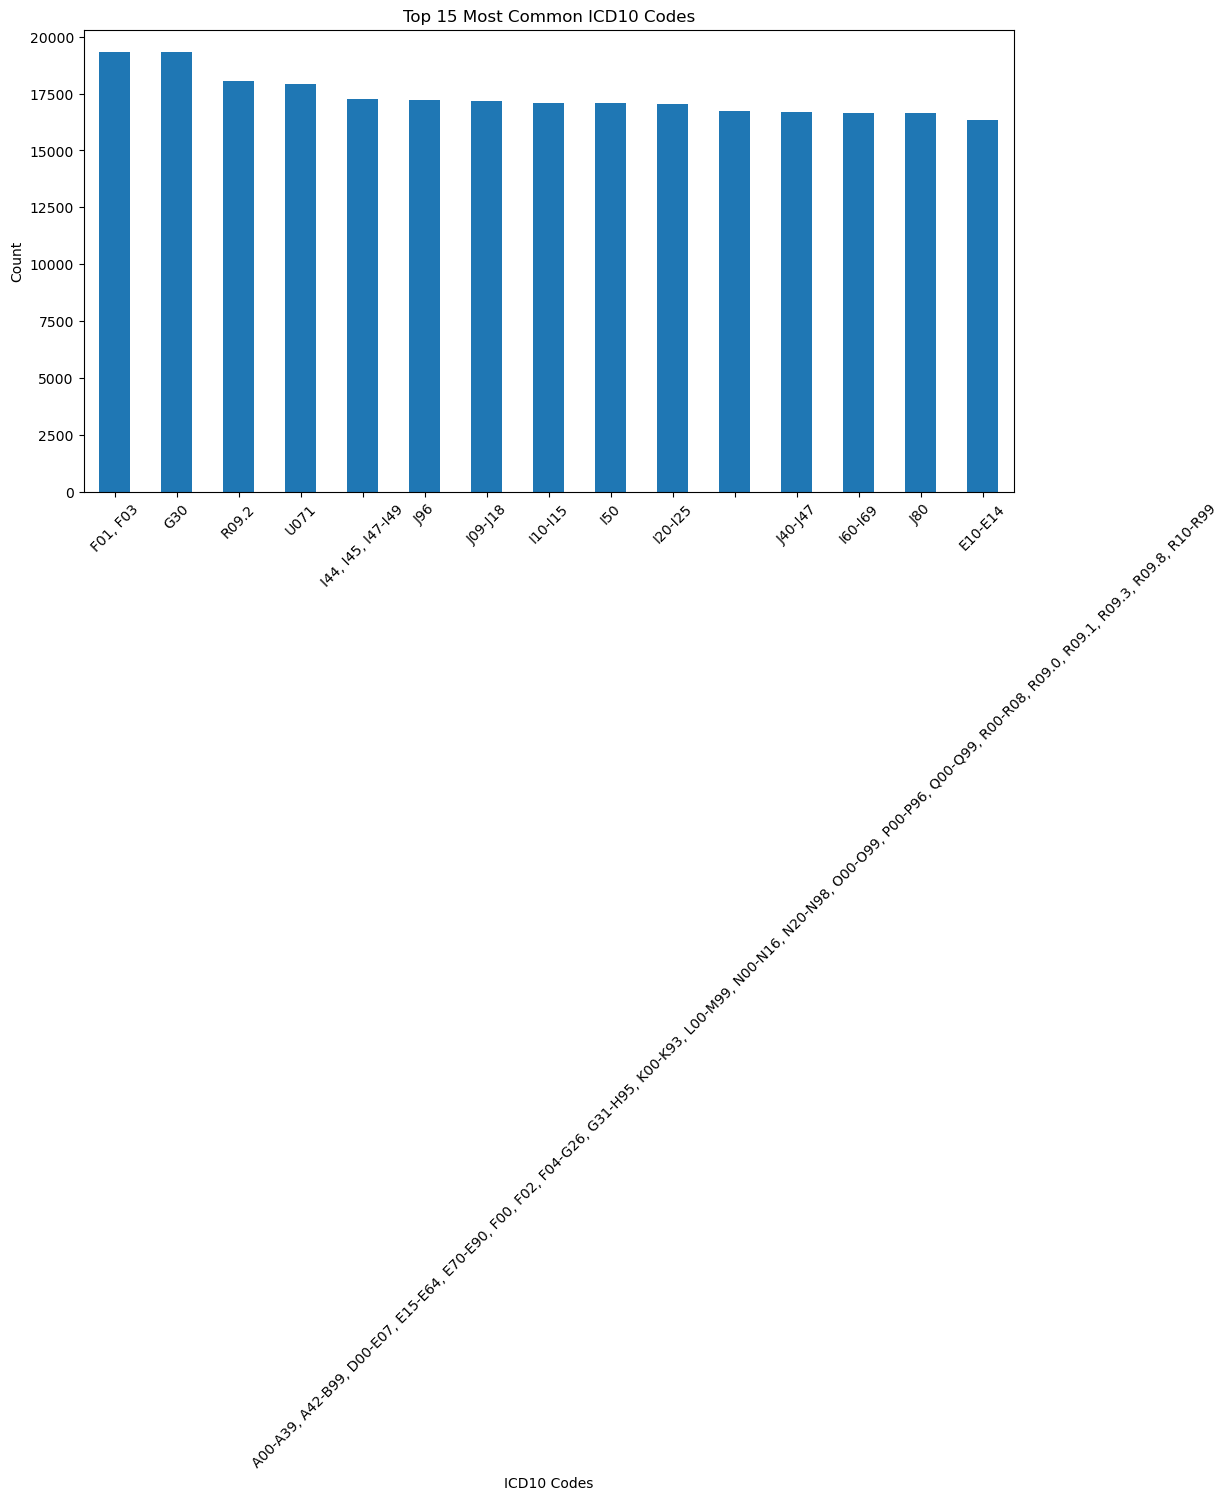

In [103]:
# Plot the top 15 ICD10 codes
plt.figure(figsize=(12, 6))
top15.plot(kind='bar')
plt.xlabel('ICD10 Codes')
plt.ylabel('Count')
plt.title('Top 15 Most Common ICD10 Codes')
plt.xticks(rotation=45)
plt.show()

Create a pivot table to show the number of COVID-19 deaths by state and month. Then, create a heatmap from this pivot table.

In [92]:
pivot_table = df.pivot_table(index='State', columns='Month', values='COVID-19 Deaths', aggfunc='sum')

In [93]:
pivot_table

Month,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0
State,,,,,,,,,,,,
Alabama,26591.0,16355.0,5752.0,3893.0,4093.0,3524.0,8461.0,18571.0,17798.0,9653.0,7069.0,14179.0
Alaska,363.0,382.0,94.0,47.0,95.0,32.0,123.0,535.0,1031.0,1284.0,805.0,598.0
Arizona,47354.0,23487.0,8175.0,5444.0,6396.0,8944.0,19132.0,13679.0,11246.0,10474.0,19970.0,42851.0
Arkansas,15658.0,10138.0,2974.0,952.0,1048.0,1847.0,5499.0,11016.0,9256.0,7884.0,7664.0,11205.0
California,235626.0,117103.0,41891.0,33746.0,32094.0,30810.0,54387.0,74589.0,63533.0,40914.0,49072.0,141850.0
Colorado,16819.0,8855.0,4976.0,9656.0,6891.0,4237.0,4192.0,4501.0,6077.0,9501.0,20754.0,25252.0
Connecticut,15390.0,6159.0,2588.0,16909.0,11036.0,2287.0,688.0,1359.0,1811.0,2347.0,4554.0,11081.0
Delaware,4595.0,1866.0,609.0,1554.0,1856.0,458.0,262.0,358.0,952.0,1061.0,1013.0,2881.0
District of Columbia,2841.0,1233.0,493.0,2542.0,2529.0,912.0,260.0,358.0,274.0,253.0,433.0,1464.0


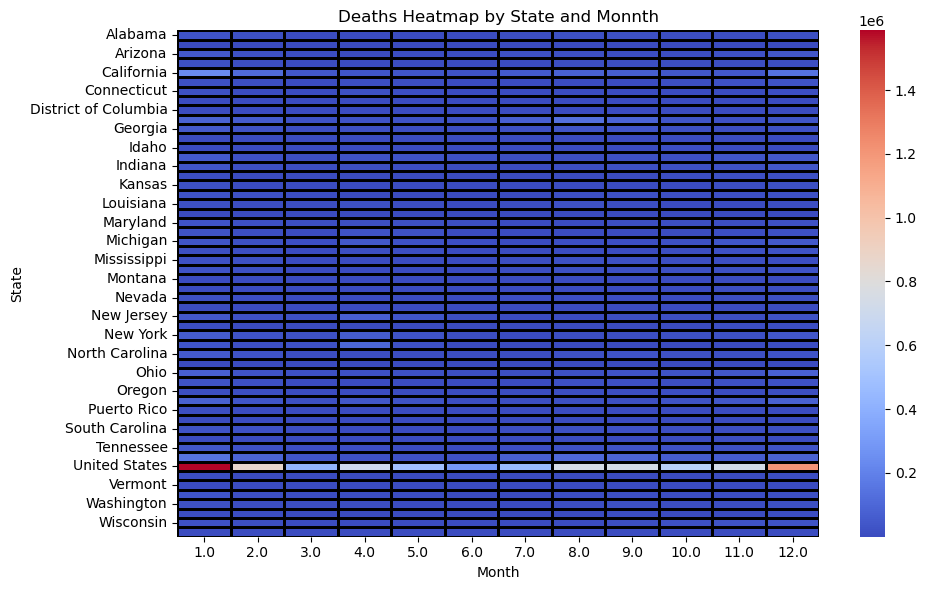

In [98]:
plt.figure(figsize=(10, 6))
sb.heatmap(pivot_table, cmap='coolwarm', fmt='.0f', linewidths=1, linecolor='black')
plt.title('Deaths Heatmap by State and Monnth')
plt.xlabel('Month')
plt.tight_layout()
plt.ylabel('State')
plt.show()

Calculate the proportion of COVID-19 deaths for each age group within each state. Create a stacked bar plot to visualize this proportion.

In [116]:
total_deaths=df_cleaned.groupby(['State'])['COVID-19 Deaths'].sum()

In [117]:
total_deaths

State
Alabama                  135939.0
Alaska                     5389.0
Arizona                  217152.0
Arkansas                  85141.0
California               915615.0
Colorado                 121711.0
Connecticut               76209.0
Delaware                  17465.0
District of Columbia      13592.0
Florida                  632475.0
Georgia                  257802.0
Hawaii                     7523.0
Idaho                     36545.0
Illinois                 278293.0
Indiana                  202740.0
Iowa                      72256.0
Kansas                    64345.0
Kentucky                 163641.0
Louisiana                119294.0
Maine                     11870.0
Maryland                 133517.0
Massachusetts            144085.0
Michigan                 248197.0
Minnesota                120820.0
Mississippi              113636.0
Missouri                 151599.0
Montana                   25480.0
Nebraska                  38002.0
Nevada                    91823.0
New Hamp

In [107]:
Deaths_by_Age_group_s = df_cleaned.groupby(['Age Group', 'State'])['COVID-19 Deaths'].sum().reset_index()

In [114]:
Deaths_by_Age_group_s[:432]

,Age Group,State,COVID-19 Deaths
0,0-24,Alabama,0.0
1,0-24,Alaska,0.0
2,0-24,Arizona,66.0
3,0-24,Arkansas,0.0
4,0-24,California,624.0
...,...,...,...
427,85+,Virginia,20422.0
428,85+,Washington,16497.0
429,85+,West Virginia,4962.0
430,85+,Wisconsin,19875.0


In [119]:
merged_df = pd.merge(Deaths_by_Age_group_s, total_deaths, on='State', suffixes=('_age', '_total'))

# Step 3: Calculate the proportion of COVID-19 deaths for each age group within each state
merged_df

,Age Group,State,COVID-19 Deaths_age,COVID-19 Deaths_total
0,0-24,Alabama,0.0,135939.0
1,25-34,Alabama,294.0,135939.0
2,35-44,Alabama,1320.0,135939.0
3,45-54,Alabama,4077.0,135939.0
4,55-64,Alabama,10832.0,135939.0
...,...,...,...,...
535,65-74,Wyoming,763.0,8683.0
536,75-84,Wyoming,960.0,8683.0
537,85+,Wyoming,938.0,8683.0
538,All Ages,Wyoming,5647.0,8683.0


In [120]:
merged_df['Proportion'] = merged_df['COVID-19 Deaths_age'] / merged_df['COVID-19 Deaths_total']

In [121]:
merged_df

,Age Group,State,COVID-19 Deaths_age,COVID-19 Deaths_total,Proportion
0,0-24,Alabama,0.0,135939.0,0.000000
1,25-34,Alabama,294.0,135939.0,0.002163
2,35-44,Alabama,1320.0,135939.0,0.009710
3,45-54,Alabama,4077.0,135939.0,0.029991
4,55-64,Alabama,10832.0,135939.0,0.079683
...,...,...,...,...,...
535,65-74,Wyoming,763.0,8683.0,0.087873
536,75-84,Wyoming,960.0,8683.0,0.110561
537,85+,Wyoming,938.0,8683.0,0.108027
538,All Ages,Wyoming,5647.0,8683.0,0.650351


In [129]:
import matplotlib.colors as mcolors

# Get a list of 54 distinct colors from a colormap
colors = list(mcolors.TABLEAU_COLORS.values())

# Print the list of colors
print(colors)

['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']


C:\Users\Arun\AppData\Local\Temp\ipykernel_15500\3641654816.py:17: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


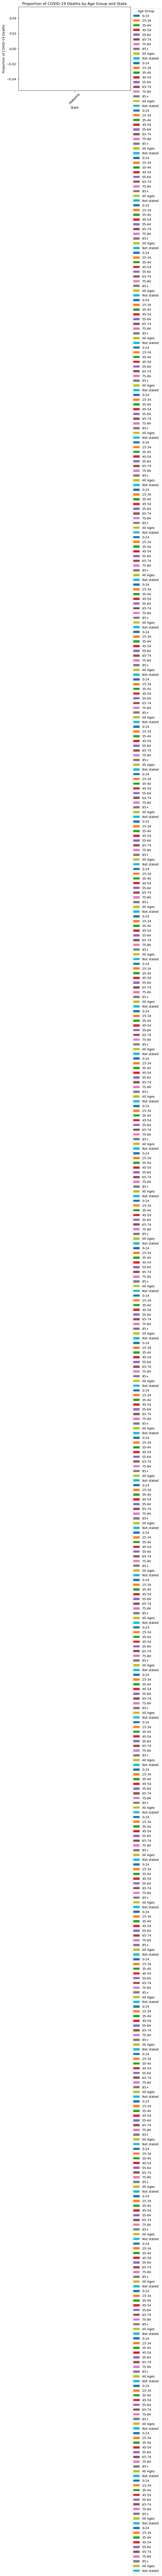

In [134]:
for i, state in enumerate(states):
    state_data = merged_df[merged_df['State'] == state]
    for j, age_group in enumerate(state_data['Age Group'].unique()):
        age_group_data = state_data[state_data['Age Group'] == age_group]
        plt.bar(state_data['State'], age_group_data['Proportion'], color=colors[j], label=age_group, bottom=bottom)
        if bottom is None:
            bottom = age_group_data['Proportion']
        else:
            bottom += age_group_data['Proportion']

# Add labels and title
plt.xlabel('State')
plt.ylabel('Proportion of COVID-19 Deaths')
plt.title('Proportion of COVID-19 Deaths by Age Group and State')
plt.legend(title='Age Group', loc='upper left', bbox_to_anchor=(1, 1))
plt.xticks(rotation=45)
plt.tight_layout()

['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
